In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
import torch.optim as optim
from copy import deepcopy
import torch.nn as nn
import pandas as pd
import numpy as np
import torch

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_food_trade = pd.read_csv('/content/drive/MyDrive/fao_data/food_trade.csv')

df_food_trade

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.00,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.00,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.00,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.00,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.00,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141733,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2020,2020,1000 USD,794956.99,A,Official figure,NaN
141734,TCL,Crops and livestock products,716,Zimbabwe,5622,Import Value,F1896,Tobacco,2021,2021,1000 USD,18265.04,A,Official figure,NaN
141735,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2021,2021,1000 USD,836533.69,A,Official figure,NaN
141736,TCL,Crops and livestock products,716,Zimbabwe,5622,Import Value,F1896,Tobacco,2022,2022,1000 USD,27138.09,A,Official figure,NaN


In [ ]:
df_land_temperature = pd.read_csv('/content/drive/MyDrive/fao_data/land_temperature.csv')

df_land_temperature

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2018,2018,°c,0.311,E,Estimated value
54806,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2019,2019,°c,0.311,E,Estimated value
54807,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2020,2020,°c,0.311,E,Estimated value
54808,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2021,2021,°c,0.311,E,Estimated value


In [ ]:
df_exchange_rate = pd.read_csv('/content/drive/MyDrive/fao_data/exchange_rate.csv')

df_exchange_rate

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103271,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7009,September,NaN,597.970000,X,Figure from international organizations
103272,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7010,October,NaN,628.716452,X,Figure from international organizations
103273,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7004,April,NaN,981.370229,X,Figure from international organizations
103274,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7005,May,NaN,1439.613438,X,Figure from international organizations


# Data preprocessing Section

## Feature Engineering

Calculate average of avg exchange rate per year

In [ ]:
avg_exchange_rate_per_year = df_exchange_rate.groupby(['Year', 'Area'])['Value'].mean().reset_index()
avg_exchange_rate_per_year = pd.DataFrame()._append(avg_exchange_rate_per_year, ignore_index=True)

avg_exchange_rate_per_year

,Year,Area,Value
0,1980,Afghanistan,44.129167
1,1980,Algeria,3.837450
2,1980,Angola,29.900000
3,1980,Anguilla,2.700000
4,1980,Antigua and Barbuda,2.700000
...,...,...,...
8634,2023,Viet Nam,23775.571818
8635,2023,Yemen,1270.909046
8636,2023,Zambia,19.799163
8637,2023,Zimbabwe,2951.575984


Calculate average of avg land temperature per year

In [ ]:
avg_temp_per_year = df_land_temperature.groupby(['Year', 'Area'])['Value'].mean().reset_index()
avg_temp_per_year = pd.DataFrame()._append(avg_temp_per_year, ignore_index=True)

avg_temp_per_year

,Year,Area,Value
0,2000,Afghanistan,0.9128
1,2000,Albania,0.9002
2,2000,Algeria,0.6867
3,2000,American Samoa,0.4704
4,2000,Andorra,0.8999
...,...,...,...
5476,2022,Wallis and Futuna Islands,0.6122
5477,2022,Western Sahara,1.3425
5478,2022,Yemen,NaN
5479,2022,Zambia,0.5250


Purify df_food_trade

In [ ]:
df_food_trade = df_food_trade[df_food_trade['Element Code'] == 5622]

df_food_trade.drop(labels=['Domain Code', 'Domain', 'Item Code (CPC)', 'Area Code (M49)', 'Element Code',
                           'Element', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note'],
                   axis=1, inplace=True)

df_food_trade

<ipython-input-9-8c384f51fed0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food_trade.drop(labels=['Domain Code', 'Domain', 'Item Code (CPC)', 'Area Code (M49)', 'Element Code',


,Area,Item,Year,Value
0,Afghanistan,Cereals and Preparations,1991,41600.00
1,Afghanistan,Cereals and Preparations,1992,25600.00
2,Afghanistan,Cereals and Preparations,1993,40000.00
3,Afghanistan,Cereals and Preparations,1994,25700.00
4,Afghanistan,Cereals and Preparations,1995,37720.00
...,...,...,...,...
141728,Zimbabwe,Tobacco,2018,24977.84
141730,Zimbabwe,Tobacco,2019,7215.50
141732,Zimbabwe,Tobacco,2020,18370.85
141734,Zimbabwe,Tobacco,2021,18265.04


# Concatenate dataframes based on Year and Area
## Rename columns with same names

In [ ]:
df_food_trade.rename(columns={"Item": "Products", "Value": "Export Value"}, inplace=True)

avg_exchange_rate_per_year.rename(columns={"Value": "Exchange Rate"}, inplace=True)

avg_temp_per_year.rename(columns={"Value": "Land Temperature"}, inplace=True)

<ipython-input-10-69e67b26d6db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food_trade.rename(columns={"Item": "Products", "Value": "Export Value"}, inplace=True)


In [ ]:
print('Food Trade == ', df_food_trade.columns)
print('Exchange == ', avg_exchange_rate_per_year.columns)
print('Temp == ', avg_temp_per_year.columns)

Food Trade ==  Index(['Area', 'Products', 'Year', 'Export Value'], dtype='object')
Exchange ==  Index(['Year', 'Area', 'Exchange Rate'], dtype='object')
Temp ==  Index(['Year', 'Area', 'Land Temperature'], dtype='object')


## Concatenate dataframes


In [ ]:
df = pd.merge(df_food_trade, avg_exchange_rate_per_year, on=['Year', 'Area'], how='left')
df = pd.merge(df, avg_temp_per_year, on=['Year', 'Area'], how='left')

df

,Area,Products,Year,Export Value,Exchange Rate,Land Temperature
0,Afghanistan,Cereals and Preparations,1991,41600.00,50.599605,NaN
1,Afghanistan,Cereals and Preparations,1992,25600.00,50.599605,NaN
2,Afghanistan,Cereals and Preparations,1993,40000.00,50.599605,NaN
3,Afghanistan,Cereals and Preparations,1994,25700.00,425.099934,NaN
4,Afghanistan,Cereals and Preparations,1995,37720.00,833.333333,NaN
...,...,...,...,...,...,...
73909,Zimbabwe,Tobacco,2018,24977.84,322.206265,0.4625
73910,Zimbabwe,Tobacco,2019,7215.50,16.923764,0.6983
73911,Zimbabwe,Tobacco,2020,18370.85,51.329013,0.4306
73912,Zimbabwe,Tobacco,2021,18265.04,88.552447,0.1736


# Data Preprocessing
Encoding categorical data

In [ ]:
encoder_1 = LabelEncoder()
df['Area'] = encoder_1.fit_transform(df['Area'])
encoder_2 = LabelEncoder()
df['Products'] = encoder_2.fit_transform(df['Products'])
encoder_3 = LabelEncoder()
df['Year'] = encoder_3.fit_transform(df['Year'])

df

,Area,Products,Year,Export Value,Exchange Rate,Land Temperature
0,0,1,0,41600.00,50.599605,NaN
1,0,1,1,25600.00,50.599605,NaN
2,0,1,2,40000.00,50.599605,NaN
3,0,1,3,25700.00,425.099934,NaN
4,0,1,4,37720.00,833.333333,NaN
...,...,...,...,...,...,...
73909,202,11,27,24977.84,322.206265,0.4625
73910,202,11,28,7215.50,16.923764,0.6983
73911,202,11,29,18370.85,51.329013,0.4306
73912,202,11,30,18265.04,88.552447,0.1736


Shifting Export Value for three years

In [ ]:
def apply_shifts(group):
    group['Export Value Lag1'] = group['Export Value'].shift(1)
    group['Export Value Lag2'] = group['Export Value'].shift(2)
    group['Export Value Lag3'] = group['Export Value'].shift(3)
    return group


df = df.groupby('Area').apply(apply_shifts).reset_index(drop=True)

df

,Area,Products,Year,Export Value,Exchange Rate,Land Temperature,Export Value Lag1,Export Value Lag2,Export Value Lag3
0,0,1,0,41600.00,50.599605,NaN,NaN,NaN,NaN
1,0,1,1,25600.00,50.599605,NaN,41600.00,NaN,NaN
2,0,1,2,40000.00,50.599605,NaN,25600.00,41600.00,NaN
3,0,1,3,25700.00,425.099934,NaN,40000.00,25600.00,41600.00
4,0,1,4,37720.00,833.333333,NaN,25700.00,40000.00,25600.00
...,...,...,...,...,...,...,...,...,...
73909,202,11,27,24977.84,322.206265,0.4625,19845.61,15335.59,8382.56
73910,202,11,28,7215.50,16.923764,0.6983,24977.84,19845.61,15335.59
73911,202,11,29,18370.85,51.329013,0.4306,7215.50,24977.84,19845.61
73912,202,11,30,18265.04,88.552447,0.1736,18370.85,7215.50,24977.84


Data Normalization

Drop Null value

In [ ]:
df.fillna(0, inplace=True)

df

,Area,Products,Year,Export Value,Exchange Rate,Land Temperature,Export Value Lag1,Export Value Lag2,Export Value Lag3
0,0,1,0,41600.00,50.599605,0.0000,0.00,0.00,0.00
1,0,1,1,25600.00,50.599605,0.0000,41600.00,0.00,0.00
2,0,1,2,40000.00,50.599605,0.0000,25600.00,41600.00,0.00
3,0,1,3,25700.00,425.099934,0.0000,40000.00,25600.00,41600.00
4,0,1,4,37720.00,833.333333,0.0000,25700.00,40000.00,25600.00
...,...,...,...,...,...,...,...,...,...
73909,202,11,27,24977.84,322.206265,0.4625,19845.61,15335.59,8382.56
73910,202,11,28,7215.50,16.923764,0.6983,24977.84,19845.61,15335.59
73911,202,11,29,18370.85,51.329013,0.4306,7215.50,24977.84,19845.61
73912,202,11,30,18265.04,88.552447,0.1736,18370.85,7215.50,24977.84


In [ ]:

features = ['Year', 'Area', 'Products', 'Exchange Rate', 'Land Temperature',
            'Export Value Lag1', 'Export Value Lag2', 'Export Value', 'Export Value Lag3']

normalized_features = ['Exchange Rate', 'Land Temperature', 'Export Value', 'Export Value Lag1', 'Export Value Lag2',
                       'Export Value Lag3']

scaler = RobustScaler()
df[normalized_features] = scaler.fit_transform(df[normalized_features])

df

,Area,Products,Year,Export Value,Exchange Rate,Land Temperature,Export Value Lag1,Export Value Lag2,Export Value Lag3
0,0,1,0,0.024447,0.234375,-0.667761,-0.181886,-0.181107,-0.180283
1,0,1,1,-0.055376,0.234375,-0.667761,0.026686,-0.181107,-0.180283
2,0,1,2,0.016465,0.234375,-0.667761,-0.053534,0.028539,-0.180283
3,0,1,3,-0.054877,2.360152,-0.667761,0.018664,-0.052094,0.030450
4,0,1,4,0.005090,4.677407,-0.667761,-0.053032,0.020476,-0.050601
...,...,...,...,...,...,...,...,...,...
73909,202,11,27,-0.058480,1.776096,-0.144038,-0.082385,-0.103822,-0.137820
73910,202,11,28,-0.147095,0.043221,0.122976,-0.056653,-0.081094,-0.102598
73911,202,11,29,-0.091442,0.238515,-0.180161,-0.145709,-0.055229,-0.079751
73912,202,11,30,-0.091970,0.449807,-0.471181,-0.089779,-0.144744,-0.053753


Select Input and Label

In [ ]:
target = 'Export Value Lag3'

X = df[features]
Y = df[target]

Split Test and Train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_test_df = deepcopy(X_test)
y_test_df = deepcopy(y_train)

Convert Vectors to Pytorch Tensors

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train = torch.tensor(X_train.values.astype(np.float32)).to(device)
X_test = torch.tensor(X_test.values.astype(np.float32)).to(device)
y_train = torch.tensor(y_train.values.astype(np.float32)).to(device)
y_test = torch.tensor(y_test.values.astype(np.float32)).to(device)

# Model
## Define a MLP model

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(len(features), 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

    def forward(self, x):
        return self.layers(x)

model = MLP().to(device)


Hyperparameters

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

epochs = 1000
train_losses = []
test_losses = []

Training model

In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs.squeeze(), y_test)
        test_losses.append(test_loss.item())
        print(f'Epoch {epoch + 1}: Loss = {loss.item()}, Test Loss = {test_loss.item()}')

Epoch 1: Loss = 1286313472.0, Test Loss = 515.31298828125
Epoch 2: Loss = 885110272.0, Test Loss = 366.1660461425781
Epoch 3: Loss = 568093824.0, Test Loss = 258.38824462890625
Epoch 4: Loss = 336602560.0, Test Loss = 181.80477905273438
Epoch 5: Loss = 171113232.0, Test Loss = 132.9900360107422
Epoch 6: Loss = 67238584.0, Test Loss = 106.45787048339844
Epoch 7: Loss = 13885695.0, Test Loss = 96.89295959472656
Epoch 8: Loss = 25588.41015625, Test Loss = 98.33260345458984
Epoch 9: Loss = 12419355.0, Test Loss = 106.22813415527344
Epoch 10: Loss = 40218412.0, Test Loss = 116.31409454345703
Epoch 11: Loss = 73017056.0, Test Loss = 125.13461303710938
Epoch 12: Loss = 102115512.0, Test Loss = 130.47779846191406
Epoch 13: Loss = 121847192.0, Test Loss = 131.40501403808594
Epoch 14: Loss = 129857344.0, Test Loss = 127.88726043701172
Epoch 15: Loss = 126518496.0, Test Loss = 120.59712219238281
Epoch 16: Loss = 113996120.0, Test Loss = 110.63233184814453
Epoch 17: Loss = 95344040.0, Test Loss = 

Plot train/test loss

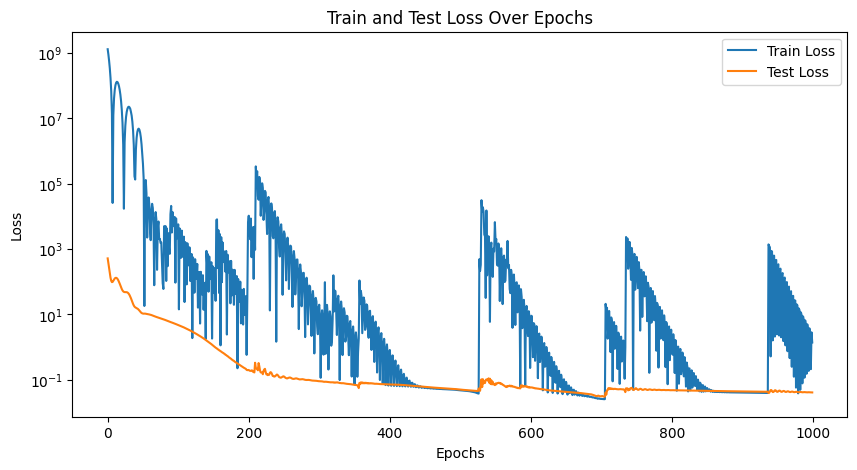

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

Evaluate the model performance

In [ ]:
model.eval()
total = 0
correct = 0

threshold = 0.1

with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions.squeeze(), y_test)

    diff = torch.abs(predictions.squeeze() - y_test)
    correct = (diff < threshold).sum().item()
    total = y_test.size(0)

    accuracy = 100 * correct / total

    print(f'Final Test Loss: {test_loss.item()}')
    print(f'Test Accuracy (within {threshold} threshold): {accuracy:.2f}%')

Final Test Loss: 0.04097619652748108
Test Accuracy (within 0.1 threshold): 90.85%


In [45]:
x_test_df = pd.DataFrame(deepcopy(X_test.cpu().numpy()), columns=features)

#y_test_df = pd.Series(deepcopy(y_test.cpu().numpy()), name='Export Value Lag3')

final_csv = pd.DataFrame()
final_csv['Year'] = encoder_3.inverse_transform(x_test_df['Year'].astype(int))
final_csv['Area'] = encoder_1.inverse_transform(x_test_df['Area'].astype(int))
final_csv['Products'] = encoder_2.inverse_transform(x_test_df['Products'].astype(int))


cpu_predictions = predictions.cpu().numpy().squeeze()
predictions_df = pd.Series(cpu_predictions, name='Prediction')
p = pd.DataFrame(scaler.inverse_transform(x_test_df[normalized_features]), columns=normalized_features)
y_test_df = p['Export Value Lag3']
x_test_df['Export Value Lag3'] = predictions_df
p = pd.DataFrame(scaler.inverse_transform(x_test_df[normalized_features]), columns=normalized_features)
predictions_df = p['Export Value Lag3']

final_csv['True Label'] = y_test_df
final_csv['Prediction'] = predictions_df
final_csv.to_csv('predictions.csv', index=False)

print(final_csv)

       Year               Area                          Products  \
0      2019            Ukraine                        Other food   
1      2012           Honduras                        Other food   
2      2017            Türkiye  Fats and Oils (excluding Butter)   
3      2017            Belgium          Non-edible Fats and Oils   
4      2019              Kenya           Non-alcoholic Beverages   
...     ...                ...                               ...   
14778  2011  Brunei Darussalam               Alcoholic Beverages   
14779  2012            Czechia               Alcoholic Beverages   
14780  1992   Papua New Guinea  Fats and Oils (excluding Butter)   
14781  1993            Senegal                   Sugar and Honey   
14782  1996              Italy              Fruit and Vegetables   

         True Label    Prediction  
0      1.037876e+06  1.040390e+06  
1      1.636050e+05  1.618912e+05  
2      2.042384e+06  2.042151e+06  
3      2.652552e+05  2.602780e+05  
4  